TANG Kévin

# Atelier 1 : Détection d’anomalies avec Python

In [1]:
import numpy as np
np.set_printoptions(threshold=10000, suppress = True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## 1 Sur la base de données Mouse

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Machine_Learning/TP/mouse.txt',sep=' ', names=['x', 'y'])

In [ ]:
data = pd.read_csv('mouse.txt',sep=' ', names=['x', 'y'])

In [ ]:
data

,x,y
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470
...,...,...
495,0.151506,0.876586
496,0.860308,0.633833
497,0.862083,0.591805
498,0.916030,0.523391


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
data.head()

,x,y
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


In [ ]:
data[data.isna().any(axis=1)].index

Int64Index([], dtype='int64')

In [ ]:
data[-10:]

,x,y
490,0.290950,0.855767
491,0.750068,0.897028
492,0.040555,0.507240
493,0.835162,0.138940
494,0.174740,0.363686
495,0.151506,0.876586
496,0.860308,0.633833
497,0.862083,0.591805
498,0.916030,0.523391
499,0.427325,0.833767


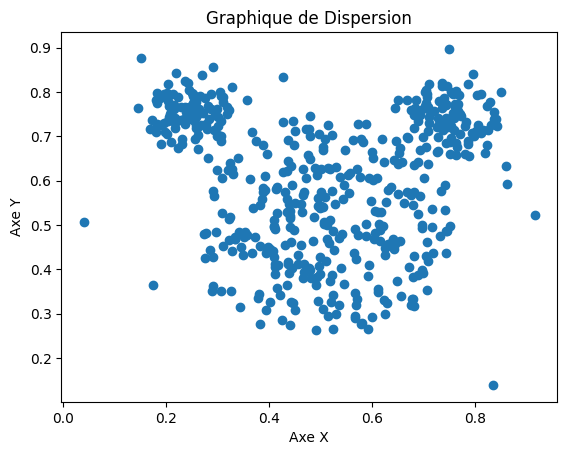

In [ ]:
# Créer un graphique de dispersion
plt.scatter(data['x'], data['y'])

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X')
plt.ylabel('Axe Y')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

### 1.1 IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(random_state=1)
IF.fit(data)
decision_IF = IF.decision_function(data)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  2.,  2.,  4.,  1.,  0.,
         3.,  2.,  6.,  2.,  6.,  6.,  7., 14.,  5., 14., 13., 12., 17.,
        19., 24., 24., 33., 43., 59., 56., 50., 43., 16.,  8.]),
 array([-0.2251206 , -0.21921355, -0.21330651, -0.20739946, -0.20149241,
        -0.19558537, -0.18967832, -0.18377128, -0.17786423, -0.17195719,
        -0.16605014, -0.1601431 , -0.15423605, -0.148329  , -0.14242196,
        -0.13651491, -0.13060787, -0.12470082, -0.11879378, -0.11288673,
        -0.10697968, -0.10107264, -0.09516559, -0.08925855, -0.0833515 ,
        -0.07744446, -0.07153741, -0.06563037, -0.05972332, -0.05381627,
        -0.04790923, -0.04200218, -0.03609514, -0.03018809, -0.02428105,
        -0.018374  , -0.01246695, -0.00655991, -0.00065286,  0.00525418,
         0.01116123,  0.01706827,  0.02297532,  0.02888236,  0.03478941,
         0.04069646,  0.0466035 ,  0.05251055,  0.05841759,

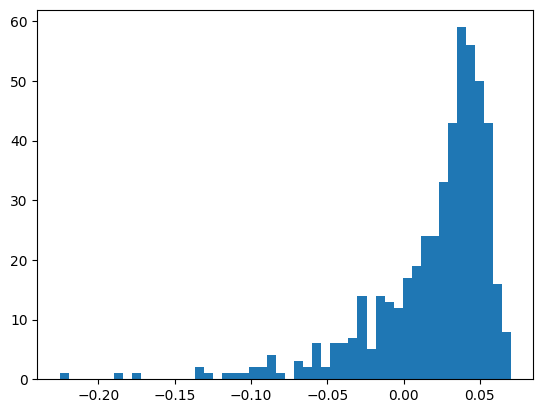

In [ ]:
plt.hist(decision_IF, bins=50)

In [ ]:
score_decision_IF = decision_IF.copy()
seuil_IF = -0.07
decision_IF[score_decision_IF <= seuil_IF] = 1
decision_IF[score_decision_IF > seuil_IF] = 0

In [ ]:
decision_IF

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

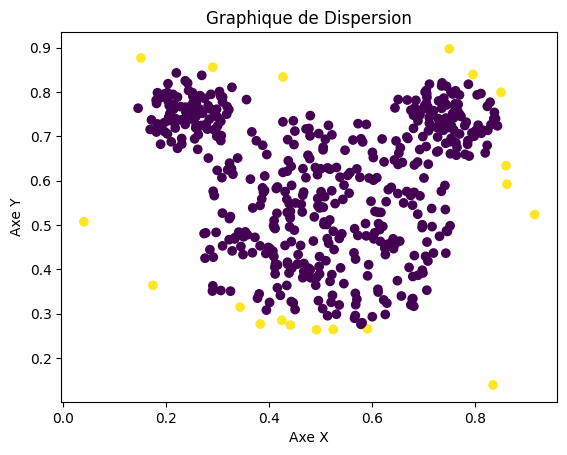

In [ ]:
# Créer un graphique de dispersion
plt.scatter(data['x'], data['y'], c=decision_IF)

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X')
plt.ylabel('Axe Y')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

### 1.2 LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
LOF = LocalOutlierFactor()
LOF.fit(data)
decision_LOF = LOF.negative_outlier_factor_

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,   6.,
          9.,  15.,  30.,  58., 174., 194.]),
 array([-4.28280669, -4.21594981, -4.14909293, -4.08223605, -4.01537916,
        -3.94852228, -3.8816654 , -3.81480852, -3.74795164, -3.68109476,
        -3.61423787, -3.54738099, -3.48052411, -3.41366723, -3.34681035,
        -3.27995347, -3.21309659, -3.1462397 , -3.07938282, -3.01252594,
        -2.94566906, -2.87881218, -2.8119553 , -2.74509841, -2.67824153,
        -2.61138465, -2.54452777, -2.47767089, -2.41081401, -2.34395713,
        -2.27710024, -2.21024336, -2.14338648, -2.0765296 , -2.00967272,
        -1.94281584, -1.87595895, -1.80910207, -1.74224519, -1.67538831,
        -1.60853143, -1.54167455, -1.47481767, -1.40796078, -1.3411039 ,
 

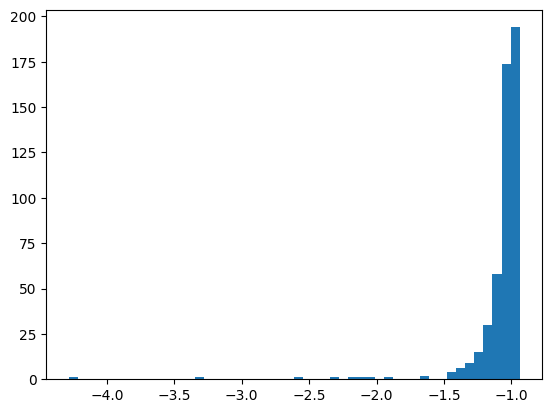

In [ ]:
plt.hist(decision_LOF, bins=50)

In [ ]:
score_decision_LOF = decision_LOF.copy()
seuil_LOF = -1.5
decision_LOF[score_decision_LOF <= seuil_LOF] = 1
decision_LOF[score_decision_LOF > seuil_LOF] = 0

In [ ]:
decision_LOF

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

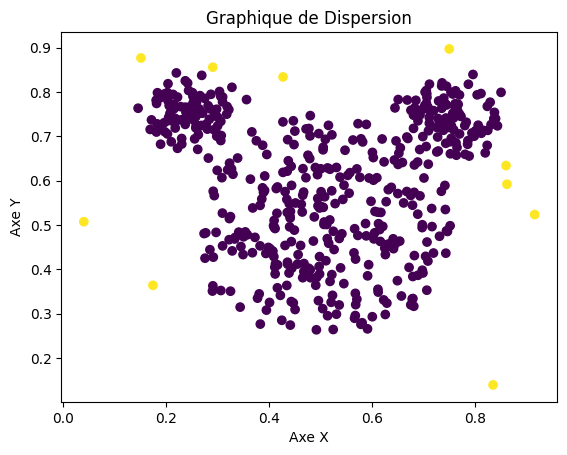

In [ ]:
# Créer un graphique de dispersion
plt.scatter(data['x'], data['y'], c=decision_LOF)

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X')
plt.ylabel('Axe Y')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

### 1.3 Comparaison des résultats

In [ ]:
(decision_IF == 1).sum()

19

In [ ]:
(decision_LOF == 1).sum()

10

D'après l'énoncé, il y a 10 valeurs aberrantes.

L'algorithme de l'IsolationForest semble compter certaines données en trop comme outliers alors qu'il ne devrait pas.

## 2 Sur le jeu de données des cartes de crédits et de détection d’intrusions dans les réseaux

In [3]:
def load_data(link, label_name, label_value):
  data = pd.read_csv(link, sep=',')
  if 'Time' in data.columns:
    data = data.drop('Time', axis=1)
  col_Class = data[label_name]
  data = data.drop(label_name, axis=1)

  if col_Class.dtype == 'object':
    col_Class = col_Class.apply(lambda x: 0 if x == label_value else 1)

  return data, col_Class

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_norm_data(data, y):
  x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.5, random_state=1, stratify=y)

  scaler = StandardScaler()
  x_train_norm = scaler.fit_transform(x_train)
  x_test_norm = scaler.transform(x_test)

  return x_train, x_test, y_train, y_test, x_train_norm, x_test_norm

In [5]:
#TEST
#data_credit, col_Class = load_data('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Machine_Learning/TP/creditcard.csv')
#x_train, x_test, y_train, y_test, x_train_norm, x_test_norm = split_norm_data(data_credit, col_Class)

### Fonction score

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize


def plot_courbe_roc(fpr, tpr, y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Spécificité')
    plt.ylabel('Sensibilité')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.show()

def function_score(model_name, clf, x_test_norm, y_test, y_pred, undersampling, oversampling) :
    probas = clf.predict_proba(x_test_norm)
    probas_pos = probas[:,-1]
    print('Matrice de confusion :', pd.DataFrame(confusion_matrix(y_test, y_pred)))
    print('Score F1 :', f1_score(y_test, y_pred))
    score = average_precision_score(y_test, probas_pos)
    print('Score AUC-PR :', score)
    print('Score AUC-ROC :', roc_auc_score(y_test, y_pred))

    #fper, tper, thresholds = metrics.roc_curve(y_test, probas_pos)
    #plot_courbe_roc(fper, tper, y_test, probas_pos)
    store_scores(model_name, score, undersampling, oversampling)


### Fonction algorithmes

In [7]:
def store_scores(model, score, undersampling, oversampling):

    if undersampling:
      model_name = model + '_tl'
      dict_scores[model_name] = score
    elif oversampling:
      model_name = model + '_smote'
      dict_scores[model_name] = score
    else:
      dict_scores[model] = score

In [8]:
def store_models(model_name, y_pred, undersampling, oversampling):
  if not undersampling and not oversampling :
    dict_models[model_name] = y_pred
  elif undersampling and not oversampling :
    tl_name = model_name + '_tl'
    dict_models[tl_name] = y_pred
  elif not undersampling and oversampling :
    smote_name = model_name + '_smote'
    dict_models[smote_name] = y_pred

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

def function_algos(x_train_norm, y_train, x_test_norm, y_test, undersampling, oversampling):
  print('- NAIVE BAYES :')
  GNB = GaussianNB()
  y_pred_gnb = GNB.fit(x_train_norm, y_train).predict(x_test_norm)
  function_score('GaussianNB', GNB, x_test_norm, y_test, y_pred_gnb, undersampling, oversampling)
  store_models('GaussianNB', y_pred_gnb, undersampling, oversampling)
  print()

  print('- RANDOMFOREST :')
  RF = RandomForestClassifier(random_state=1)
  y_pred_rf = RF.fit(x_train_norm, y_train).predict(x_test_norm)
  function_score('RandomForest', RF, x_test_norm, y_test, y_pred_rf, undersampling, oversampling)
  store_models('RandomForest', y_pred_rf, undersampling, oversampling)
  print()

  print('- MLPCLASSIFIER :')
  MLP = MLPClassifier(random_state=1)
  y_pred_mlp = MLP.fit(x_train_norm, y_train).predict(x_test_norm)
  function_score('MLP', MLP, x_test_norm, y_test, y_pred_mlp, undersampling, oversampling)
  store_models('MLP', y_pred_mlp, undersampling, oversampling)
  print()

  #print('- GRADIENTBOOSTING : ')
  #GB = GradientBoostingClassifier(random_state = 1)
  #y_pred_gb = GB.fit(x_train_norm, y_train).predict(x_test_norm)
  #function_score('GradientBoosting', MLP, x_test_norm, y_test, y_pred_gb, undersampling, oversampling)
  #store_models('GradientBoosting', y_pred_gb, undersampling, oversampling)
  #print()


In [10]:
#function_algos(x_train_norm, y_train, x_test_norm, y_test, False, False)

### Tomek Links : Undersampling

In [11]:
from imblearn.under_sampling import TomekLinks

def function_tl(x_train_norm, y_train, x_test_norm, y_test):
  print('--- TOMEK LINKS FUNCTION ---')
  print()

  TL = TomekLinks()
  x_tl, y_tl = TL.fit_resample(x_train_norm, y_train)

  print('x_tl.shape :', x_tl.shape)
  print('y_tl.shape :', y_tl.shape)
  print('x_test_norm.shape :', x_test_norm.shape)
  print('y_test.shape :', y_test.shape)
  print()

  function_algos(x_tl, y_tl, x_test_norm, y_test, True, False)


In [12]:
#TEST
#function_tl(x_train_norm, y_train, x_test_norm, y_test)

### Synthetic Minority Oversampling Technique (SMOTE) : Oversampling

In [12]:
from imblearn.over_sampling import SMOTE

def function_smote(x_train_norm, y_train, x_test_norm, y_test):
  print('--- SMOTE FUNCTION ---')
  print()

  SM = SMOTE(random_state=1)
  x_smote, y_smote = SM.fit_resample(x_train_norm, y_train)

  print('x_smote.shape :', x_smote.shape)
  print('y_smote.shape :', y_smote.shape)
  print('x_test_norm.shape :', x_test_norm.shape)
  print('y_test.shape :', y_test.shape)
  print()

  function_algos(x_smote, y_smote, x_test_norm, y_test, False, True)


In [14]:
#TEST
#function_smote(x_train_norm, y_train, x_test_norm, y_test)

### 2.1 IsolationForest

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from numpy import quantile

def function_IsoForest(data_credit , contamination_rate, x_train_norm, y_train):

  #IsolationForest
  IF = IsolationForest(random_state=1, contamination=contamination_rate)

  #GridSearch
  param_grid = {
      'n_estimators': [400] #Modifié pour raccourcir le temps d'exécution
  }
  grid_search = GridSearchCV(estimator=IF, param_grid=param_grid, scoring=make_scorer(average_precision_score))
  grid_search.fit(x_train_norm, y_train)

  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_
  print(best_params)
  print(best_model)
  print()

  #IsolationForest avec paramètres du GridSearch
  IF = IsolationForest(random_state=1, contamination=contamination_rate, n_estimators=best_params['n_estimators'])
  IF.fit(x_train_norm)

  #Normalisation des données globales
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  data_credit_norm = scaler.fit_transform(data_credit)

  #IsolationForest sur les données globales normalisées
  decision_IF = IF.decision_function(data_credit_norm)

  #Affichage de l'histogramme
  plt.hist(decision_IF, bins=50)
  plt.show()

  #Recherche du seuil
  seuil_IF = quantile(decision_IF, contamination_rate)
  print('Seuil IF :', seuil_IF)

In [16]:
#TEST
#function_IsoForest(data_credit, 0.002, x_train_norm, y_train)

### 2.2 LocalOutlierFactor

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from numpy import quantile
from sklearn.metrics import average_precision_score

def function_LocalOutlierFactor(data_credit, contamination_rate, x_train_norm, y_train):

  #LocalOutlierFactor
  LOF = LocalOutlierFactor(contamination=contamination_rate)

  #GridSearch
  param_grid = {
      'n_neighbors': [20] #Modifié pour raccourcir le temps d'exécution
  }
  grid_search = GridSearchCV(estimator=LOF, param_grid=param_grid, scoring=make_scorer(average_precision_score))
  grid_search.fit(x_train_norm, y_train)

  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_
  print(best_params)
  print(best_model)
  print()

  #LocalOutlierFactor avec paramètres du GridSearch
  LOF = LocalOutlierFactor(contamination=contamination_rate, n_neighbors=best_params['n_neighbors'])

  #LocalOutlierFactor sur les données globales normalisées
  LOF.fit(data_credit)
  decision_LOF = LOF.negative_outlier_factor_

  #Affichage de l'histogramme
  plt.hist(decision_LOF, bins=50)
  plt.show()

  #Recherche du seuil
  seuil_LOF = quantile(decision_LOF, contamination_rate)
  print('Seuil LOF :', seuil_LOF)


In [18]:
#TEST
#function_LocalOutlierFactor(data_credit, 0.002, x_train_norm, y_train)

### Main

In [15]:
def choose_best_model():
  max_score = 0
  model = None
  for model_name, score in dict_scores.items():
    if max_score < score:
      max_score = score
      model = model_name

  return model, max_score

In [16]:
import pickle

def create_pickle(data):
  with open('model.pickle', 'wb') as file:
    pickle.dump(data, file)
    file.close()
    print('Fichier pickle créé')
    print()

    print('Vérification du fichier pickle créé')
    with open('model.pickle', 'rb') as file:
      loaded_data = pickle.load(file)
      print(loaded_data)


In [17]:
from sklearn.preprocessing import OneHotEncoder

def trier_columns(df):
  list_num = []
  list_cat = []
  for column in df.columns:
      if df[column].dtype in ['int64', 'float64']:
        list_num.append(column)
      else:
        list_cat.append(column)
  return list_num, list_cat

def encode(df):
  list_num, list_cat = trier_columns(df)

  if not list_cat:
    return df
  else:
    data_num = df[list_num]
    data_cat = df[list_cat]
    data_cat_encode = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(np.array(data_cat)))
    new_df = pd.concat([data_num, data_cat_encode], axis=1)
    new_df.columns = new_df.columns.astype(str)

  return new_df

In [18]:
def main_function(link_to_file, label_name, label_value, contamination_rate):

  print('-----------Extraction et préparation des données-----------')
  data_credit, col_Class = load_data(link_to_file, label_name, label_value)
  data_credit = encode(data_credit)
  x_train, x_test, y_train, y_test, x_train_norm, x_test_norm = split_norm_data(data_credit, col_Class)
  print()

  print('-----------Utilisation des algorithmes-----------')
  function_algos(x_train_norm, y_train, x_test_norm, y_test, False, False)
  print()

  print('-----------Algorithme d\'undersampling-----------')
  function_tl(x_train_norm, y_train, x_test_norm, y_test)
  print()

  print('-----------Algorithme d\'oversampling-----------')
  function_smote(x_train_norm, y_train, x_test_norm, y_test)
  print()

  print('-----------Algorithme de l\'IsolationForest-----------')
  function_IsoForest(data_credit, contamination_rate, x_train_norm, y_train)
  print()

  print('-----------Algorithme de LocalOutlierFactor-----------')
  function_LocalOutlierFactor(data_credit, contamination_rate, x_train_norm, y_train)
  print()

  print('-----------Résultats de l\'algorithme-----------')
  best_model, max_score = choose_best_model()
  print('Best model :', best_model)
  print('Score AUC-PR :', max_score)
  model = dict_models[best_model]
  print('Model :', model)
  print()

  print('-----------Création du pickle-----------')
  create_pickle(model)
  print()

  print('-----------Fin de l\'algorithme-----------')

In [23]:
dict_models = {}
dict_scores = {}
model = None

-----------Extraction et préparation des données-----------

-----------Utilisation des algorithmes-----------
- NAIVE BAYES :
Matrice de confusion : [[139161   2997]
 [    32    214]]
Score F1 : 0.1238067688747469
Score AUC-PR : 0.0973688790869463

- RANDOMFOREST :
Matrice de confusion : [[142148     10]
 [    46    200]]
Score F1 : 0.8771929824561403
Score AUC-PR : 0.8696315273577295

- MLPCLASSIFIER :
Matrice de confusion : [[142149      9]
 [    55    191]]
Score F1 : 0.8565022421524663
Score AUC-PR : 0.8684408796082801

- GRADIENTBOOSTING : 
Matrice de confusion : [[142137     21]
 [    84    162]]
Score F1 : 0.7552447552447552
Score AUC-PR : 0.8684408796082801


-----------Algorithme d'undersampling-----------
--- TOMEK LINKS FUNCTION ---

x_tl.shape : (142387, 29)
y_tl.shape : (142387,)
x_test_norm.shape : (142404, 29)
y_test.shape : (142404,)

- NAIVE BAYES :
Matrice de confusion : [[139159   2999]
 [    32    214]]
Score F1 : 0.12373518357906908
Score AUC-PR : 0.09737193887576

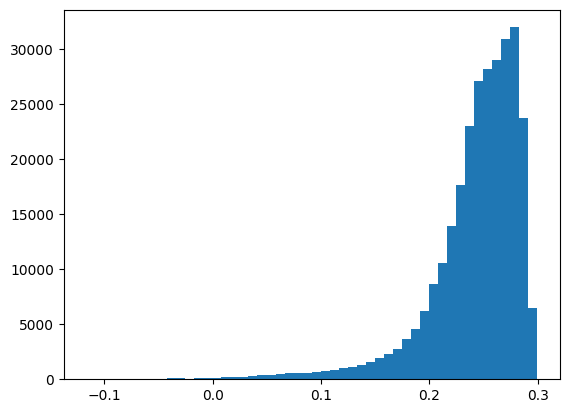

Seuil IF : -0.0013188435822973584

-----------Algorithme de LocalOutlierFactor-----------
{'n_neighbors': 20}
LocalOutlierFactor(contamination=0.002)



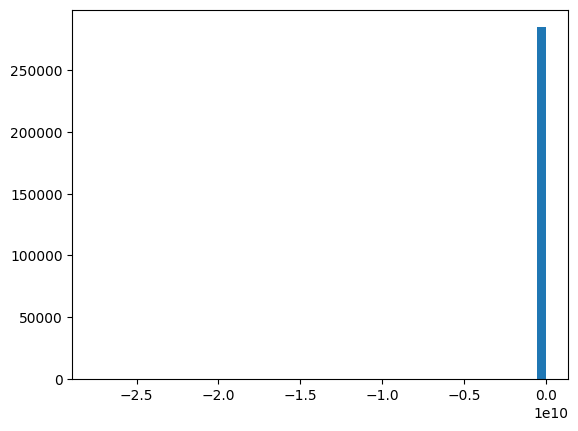

Seuil LOF : -6.618532024820344

-----------Résultats de l'algorithme-----------
Best model : RandomForest
Score AUC-PR : 0.8696315273577295
Model : [0 0 0 ... 0 0 0]

-----------Création du pickle-----------
Fichier pickle créé

Vérification du fichier pickle créé
[0 0 0 ... 0 0 0]

-----------Fin de l'algorithme-----------


In [ ]:
main_function('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Machine_Learning/TP/TP1/creditcard.csv', 'Class', None, 0.002)

In [ ]:
#model = dict_models['RandomForest']

## 3 Sur le jeu de données de détection d’intrusions dans les réseaux KDDCUP99

In [19]:
#Voir les données
data_kdd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Machine_Learning/TP/TP1/KDDCup99.csv', sep=',')

In [20]:
data_kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [21]:
dict_models = {}
dict_scores = {}
model = None

-----------Extraction et préparation des données-----------

-----------Utilisation des algorithmes-----------
- NAIVE BAYES :
Matrice de confusion : [[ 48589     49]
 [ 13116 185256]]
Score F1 : 0.9656872838351009
Score AUC-PR : 0.9980955753859859
Score AUC-ROC : 0.9664371775470638

- RANDOMFOREST :
Matrice de confusion : [[ 48628     10]
 [    35 198337]]
Score F1 : 0.9998865695870377
Score AUC-PR : 0.999998962687031
Score AUC-ROC : 0.9998089816250875

- MLPCLASSIFIER :
Matrice de confusion : [[ 48583     55]
 [    64 198308]]
Score F1 : 0.9997000516717708
Score AUC-PR : 0.9999948847029787
Score AUC-ROC : 0.9992732853735671


-----------Algorithme d'undersampling-----------
--- TOMEK LINKS FUNCTION ---

x_tl.shape : (246994, 118)
y_tl.shape : (246994,)
x_test_norm.shape : (247010, 118)
y_test.shape : (247010,)

- NAIVE BAYES :
Matrice de confusion : [[ 48588     50]
 [ 13097 185275]]
Score F1 : 0.9657359843835109
Score AUC-PR : 0.998091658290429
Score AUC-ROC : 0.9664747873422626

- 

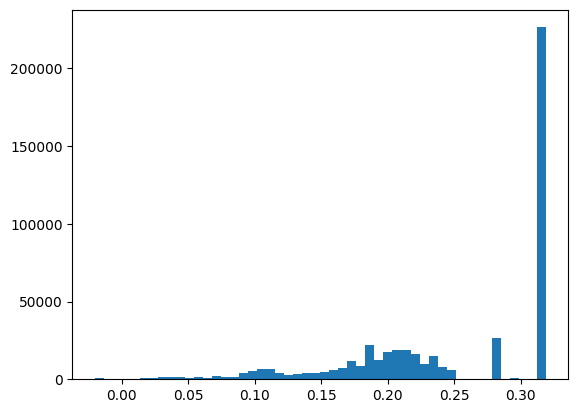

Seuil IF : -0.00528423992738003

-----------Algorithme de LocalOutlierFactor-----------
{'n_neighbors': 20}
LocalOutlierFactor(contamination=0.002)



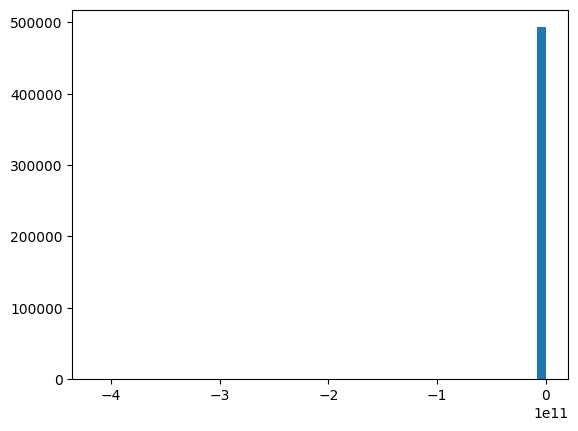

Seuil LOF : -5500000001.0

-----------Résultats de l'algorithme-----------
Best model : RandomForest_smote
Score AUC-PR : 0.9999989672100827
Model : [1 1 1 ... 1 0 1]

-----------Création du pickle-----------
Fichier pickle créé

Vérification du fichier pickle créé
[1 1 1 ... 1 0 1]

-----------Fin de l'algorithme-----------


In [22]:
main_function('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Machine_Learning/TP/TP1/KDDCup99.csv', 'label', 'normal', 0.002)